In [1]:
import pandas as pd
import numpy as np
import wrangle_zillow
import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure',figsize=(12,8))

In [2]:
df_orig = wrangle_zillow.get_zillow_data()
df_orig.shape

(77381, 67)

In [3]:
df = df_orig.copy()
df = wrangle_zillow.handle_missing_values(df)
df = preprocessing.feature_engineering(df)
df.shape

/Users/camerontaylor/codeup-data-science/clustering_project/cameron_project/wrangle_zillow.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, thresh=threshold, inplace=True)
/Users/camerontaylor/codeup-data-science/clustering_project/cameron_project/wrangle_zillow.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, thresh=threshold, inplace=True)


(52302, 16)

In [4]:
cols = ['regionidcity','regionidzip']
wrangle_zillow.cols_as_strings(df,cols)

In [5]:
df.dtypes

logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
county                           object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
rawcensustractandblock          float64
regionidcity                     object
regionidzip                      object
age                             float64
taxrate                         float64
land_sqft_price                 float64
house_sqft_price                float64
dtype: object

In [6]:
df.columns.tolist()

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'county',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'age',
 'taxrate',
 'land_sqft_price',
 'house_sqft_price']

In [7]:
df.head(1)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,age,taxrate,land_sqft_price,house_sqft_price
parcelid,,,,,,,,,,,,,,,,
10711855,0.025595,3.5,4.0,3100.0,Orange_County,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,96978.0,19.0,0.010763,119.30071,156.681613


FIPS:

- 6037: Los Angeles County
- 6059: Orange County
- 6111: Ventura County

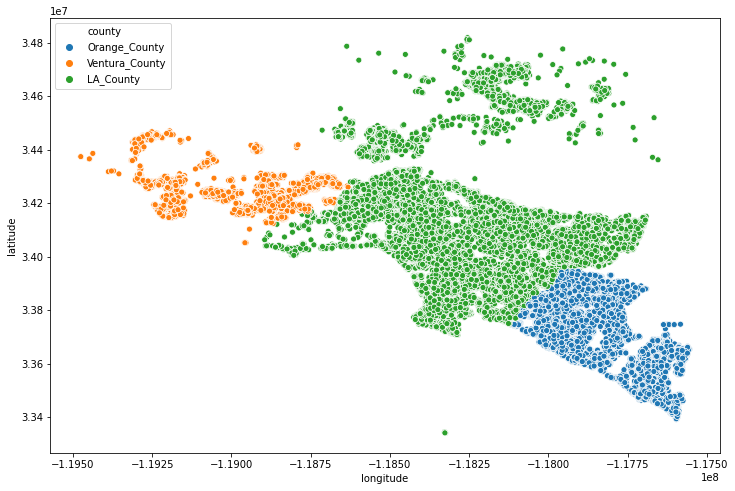

In [8]:
plt.rc('figure',figsize=(12,8))
sns.scatterplot('longitude', 'latitude', data=df, hue='county')

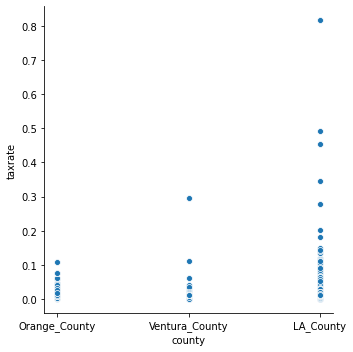

In [9]:
sns.relplot('county', 'taxrate', data=df)

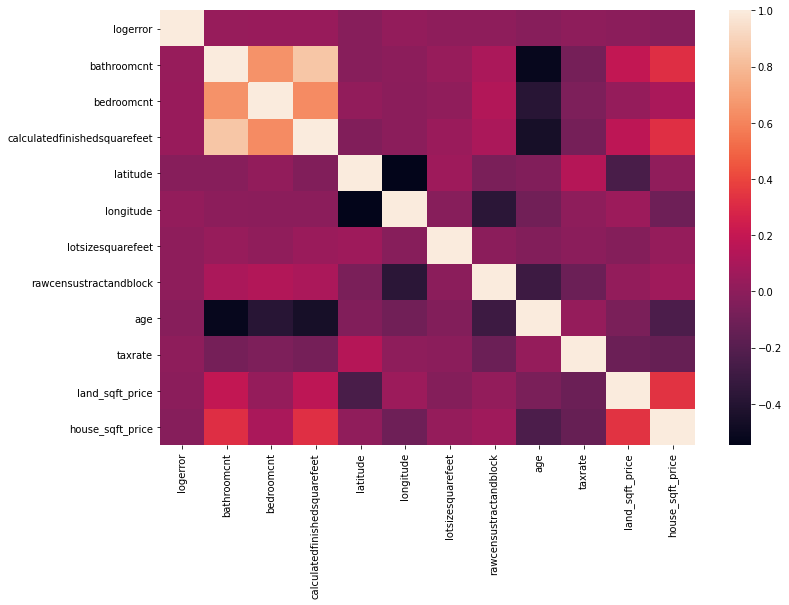

In [10]:
sns.heatmap(df.corr())

In [11]:
# sns.pairplot(df, corner=True)

In [12]:
df.shape

(52302, 16)

In [13]:
df.select_dtypes('number')

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price
parcelid,,,,,,,,,,,,
10711855,0.025595,3.5,4.0,3100.0,33634931.0,-117869207.0,4506.0,6.059063e+07,19.0,0.010763,119.300710,156.681613
10711877,0.055619,1.0,2.0,1465.0,34449266.0,-119281531.0,12647.0,6.111001e+07,50.0,0.012225,29.730371,60.068259
10711888,0.005383,2.0,3.0,1243.0,33886168.0,-117823170.0,8432.0,6.059022e+07,55.0,0.011488,56.865394,68.615447
10711910,-0.103410,3.0,4.0,2376.0,34245180.0,-118240722.0,13038.0,6.037300e+07,47.0,0.012247,2.778417,45.840909
10711956,-0.001011,3.0,4.0,2962.0,34145202.0,-118179824.0,63000.0,6.037461e+07,67.0,0.012306,7.882841,93.411209
...,...,...,...,...,...,...,...,...,...,...,...,...
167638926,0.037117,1.0,2.0,780.0,34043113.0,-118028669.0,8968.0,6.037434e+07,68.0,0.012349,30.893622,88.796154
167639152,0.001335,3.0,4.0,2630.0,34034575.0,-118424093.0,6357.0,6.037271e+07,72.0,0.012084,58.329873,138.626236
167655959,-0.007124,2.0,3.0,1296.0,33930530.0,-117984206.0,8688.0,6.037503e+07,61.0,0.011761,31.382942,143.584105


In [14]:
df_nonnumeric = df.drop(columns=df.select_dtypes('number').columns)
df_nonnumeric.head()

,county,propertycountylandusecode,regionidcity,regionidzip
parcelid,,,,
10711855,Orange_County,122,53571.0,96978.0
10711877,Ventura_County,1110,13091.0,97099.0
10711888,Orange_County,122,21412.0,97078.0
10711910,LA_County,0101,396551.0,96330.0
10711956,LA_County,0101,47019.0,96293.0


In [15]:
df.logerror.replace(df.logerror.nsmallest(2), np.nan, inplace=True)

In [16]:
cols_with_outliers = (df.select_dtypes('number')
                              .columns.tolist()[1:])
cols_with_outliers

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'age',
 'taxrate',
 'land_sqft_price',
 'house_sqft_price']

In [17]:
for s in cols_with_outliers:
    print(wrangle_zillow.count_outliers(df[s],'iqr'))

26
7
135
0
0
2175
0
0
816
560
218


In [18]:
df = wrangle_zillow.drop_all_outliers(df, cols_with_outliers)

In [19]:
for s in cols_with_outliers:
    print(wrangle_zillow.count_outliers(df[s],'iqr'))

0
0
11
0
0
61
0
0
20
0
6


In [20]:
df.logerror.nsmallest(5)

parcelid
12550805   -2.406257
12673632   -2.387800
14656064   -2.331727
10887473   -2.330162
14493057   -2.327432
Name: logerror, dtype: float64

In [21]:
df.logerror.isna().sum()

0

In [22]:
X = df.drop(columns='logerror')
y = pd.DataFrame(df['logerror'])

In [23]:
X.shape

(48143, 15)

In [24]:
county_df = pd.get_dummies(X.county)
county_df.shape
X = pd.concat([X, county_df], axis = 1)

In [25]:
X.isna().sum(), X.shape

(bathroomcnt                     0
 bedroomcnt                      0
 calculatedfinishedsquarefeet    0
 county                          0
 latitude                        0
 longitude                       0
 lotsizesquarefeet               0
 propertycountylandusecode       0
 rawcensustractandblock          0
 regionidcity                    0
 regionidzip                     0
 age                             0
 taxrate                         0
 land_sqft_price                 0
 house_sqft_price                0
 LA_County                       0
 Orange_County                   0
 Ventura_County                  0
 dtype: int64, (48143, 18))

In [26]:
X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County
parcelid,,,,,,,,,,,,,,,,,,
10711855,3.5,4.0,3100.0,Orange_County,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,96978.0,19.0,0.010763,119.300710,156.681613,0,1,0
10711877,1.0,2.0,1465.0,Ventura_County,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,97099.0,50.0,0.012225,29.730371,60.068259,0,0,1
10711888,2.0,3.0,1243.0,Orange_County,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,97078.0,55.0,0.011488,56.865394,68.615447,0,1,0
10711910,3.0,4.0,2376.0,LA_County,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,96330.0,47.0,0.012247,2.778417,45.840909,1,0,0
10711995,1.0,2.0,738.0,LA_County,34149214.0,-118239357.0,4214.0,0100,6.037302e+07,45457.0,96325.0,95.0,0.010826,47.380636,25.596206,1,0,0


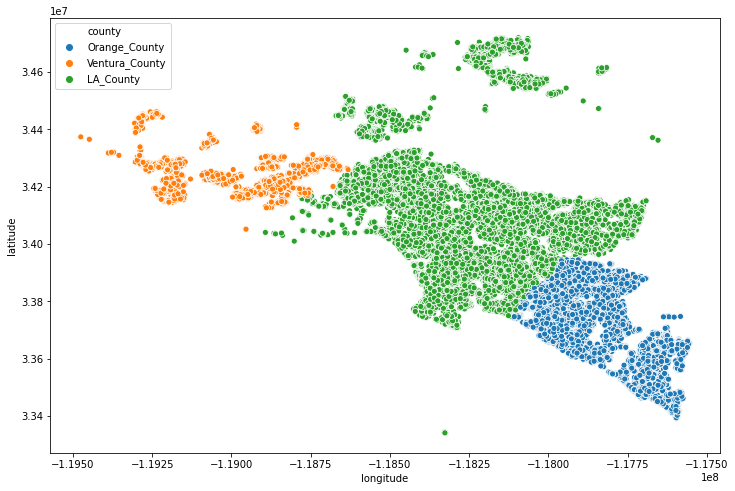

In [27]:
sns.scatterplot('longitude', 'latitude', data=X, hue='county')

# Train/Test Split

In [28]:
X_train, X_validate, X_test, y_train, y_validate, y_test = (
        preprocessing.split_data(X,y))
X_validate.shape

(7703, 18)

In [29]:
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County
parcelid,,,,,,,,,,,,,,,,,,
14219140,3.0,5.0,3810.0,LA_County,34047763.0,-118311115.0,12494.0,0100,6.037213e+07,12447.0,96000.0,108.0,0.012148,81.309188,66.657743,1,0,0
12394797,3.0,4.0,1877.0,LA_County,34401302.0,-118525772.0,7696.0,0101,6.037920e+07,54311.0,96373.0,30.0,0.015112,14.494413,109.635056,1,0,0
11846890,3.0,3.0,1907.0,LA_County,34678500.0,-118097654.0,7060.0,0100,6.037901e+07,5534.0,97318.0,27.0,0.014944,4.018272,90.862087,1,0,0
12265618,3.0,5.0,1850.0,LA_County,34301654.0,-118410731.0,7593.0,010M,6.037106e+07,12447.0,96368.0,31.0,0.012561,25.432372,96.072432,1,0,0
11548959,3.0,4.0,1993.0,Ventura_County,34437913.0,-119296292.0,12233.0,1111,6.111001e+07,13091.0,97099.0,56.0,0.012464,9.642116,120.831410,0,0,1


# Scale Data

In [30]:
y_train[['logerror']]

,logerror
parcelid,
14219140,0.120337
12394797,-0.000469
11846890,-0.033800
12265618,0.183727
11548959,0.051722
...,...
11789039,0.037869
13860893,-0.015005
11439711,0.026038


In [31]:
train_scaled, validate_scaled, test_scaled = \
        preprocessing.scale_data(X_train.select_dtypes('number'),
                                 X_validate.select_dtypes('number'),
                                 X_test.select_dtypes('number'))
y_train_scaled, y_validate_scaled, y_test_scaled = \
        preprocessing.scale_data(y_train[['logerror']], 
                                 y_validate[['logerror']],
                                 y_test[['logerror']])

In [32]:
train_scaled.head(3)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County
parcelid,,,,,,,,,,,,,,
14219140,0.375,0.555556,0.504594,0.512354,0.606393,0.549407,0.001515,0.773723,0.517644,0.266417,0.165801,1.0,0.0,0.0
12394797,0.375,0.444444,0.231378,0.768726,0.494595,0.328891,0.011084,0.204380,0.645625,0.046946,0.273237,1.0,0.0,0.0
11846890,0.375,0.333333,0.235618,0.969739,0.717568,0.299660,0.010816,0.182482,0.638360,0.012535,0.226308,1.0,0.0,0.0


In [33]:
train_scaled.shape

(30811, 14)

In [34]:
y_train.shape, y_validate.shape, y_test.shape

((30811, 1), (7703, 1), (9629, 1))

In [35]:
X_train.shape, X_validate.shape, X_test.shape

((30811, 18), (7703, 18), (9629, 18))

## Dependent Variable

In [36]:
from sklearn.cluster import KMeans

     k        sse
0    2  15.287502
1    3  10.558182
2    4   7.434276
3    5   5.532925
4    6   3.973858
5    7   3.038633
6    8   2.319255
7    9   1.772666
8   10   1.430607
9   11   1.180780
10  12   0.993684
11  13   0.857823
12  14   0.750578
13  15   0.653622
14  16   0.576773
15  17   0.513458
16  18   0.463009
17  19   0.412827


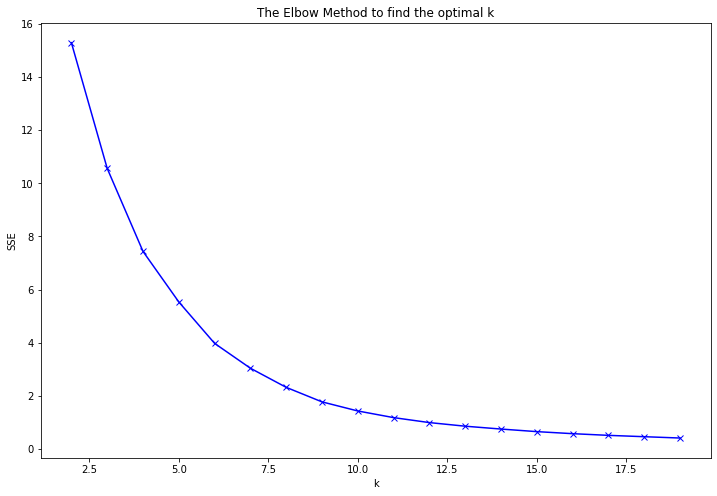

In [37]:
ks = range(2,20)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(y_train_scaled)
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(y_train)
y_train['cluster_target'] = kmeans.predict(y_train)
kmeans.fit(y_train_scaled)
y_train_scaled['cluster_target'] = kmeans.predict(y_train_scaled)
y_train

,logerror,cluster_target
parcelid,,
14219140,0.120337,2
12394797,-0.000469,0
11846890,-0.033800,0
12265618,0.183727,3
11548959,0.051722,2
...,...,...
11789039,0.037869,2
13860893,-0.015005,0
11439711,0.026038,0


In [44]:
centroids = pd.DataFrame(kmeans.cluster_centers_,
                   columns=['centroids'])
centroids['value_counts'] = y_train.copy().cluster_target\
                        .value_counts(sort=False)
centroids

,centroids,value_counts
0,0.443035,18488
1,0.821242,2455
2,0.429246,8134
3,0.321156,1300
4,0.482301,164
5,0.582179,63
6,0.042653,193
7,0.405332,14


In [48]:
y_train_scaled.head(1)

,logerror,cluster_target
parcelid,,
14219140,0.452637,0


In [49]:
train = pd.concat([train_scaled, y_train_scaled], axis=1)
validate = pd.concat([validate_scaled, y_validate_scaled], axis=1)
test = pd.concat([test_scaled, y_test_scaled], axis=1)
train.head(1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County,logerror,cluster_target
parcelid,,,,,,,,,,,,,,,,
14219140,0.375,0.555556,0.504594,0.512354,0.606393,0.549407,0.001515,0.773723,0.517644,0.266417,0.165801,1.0,0.0,0.0,0.452637,0


Text(0.5, 1.0, 'Visualizing Cluster Centers')

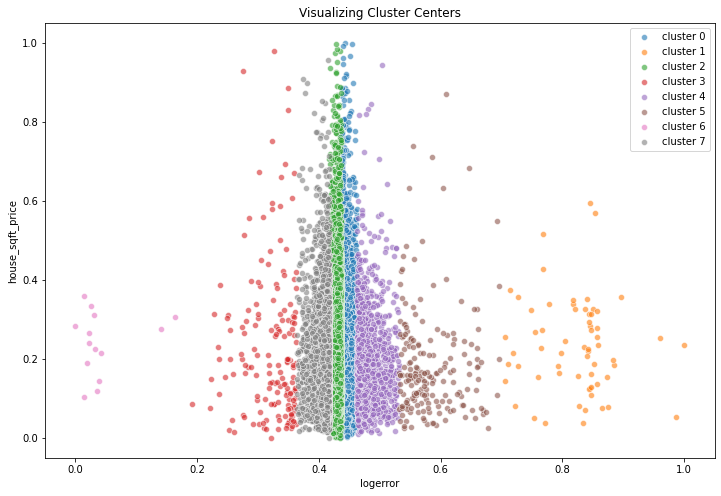

In [65]:
for cluster, subset in train.groupby('cluster_target'):
    sns.scatterplot(subset.logerror, subset.house_sqft_price, 
                label='cluster ' + str(cluster), alpha=.6)

# centroids.plot.scatter(x='logerror', y='house_sqft_price',
#                       c='black', marker='x', s=1000, ax=plt.gca(),
#                       label='centroid')

plt.legend()
plt.xlabel('logerror')
plt.ylabel('house_sqft_price')
plt.title('Visualizing Cluster Centers')

In [58]:
train.head(1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County,logerror,cluster_target,cluster_ind
parcelid,,,,,,,,,,,,,,,,,
14219140,0.375,0.555556,0.504594,0.512354,0.606393,0.549407,0.001515,0.773723,0.517644,0.266417,0.165801,1.0,0.0,0.0,0.452637,0,6


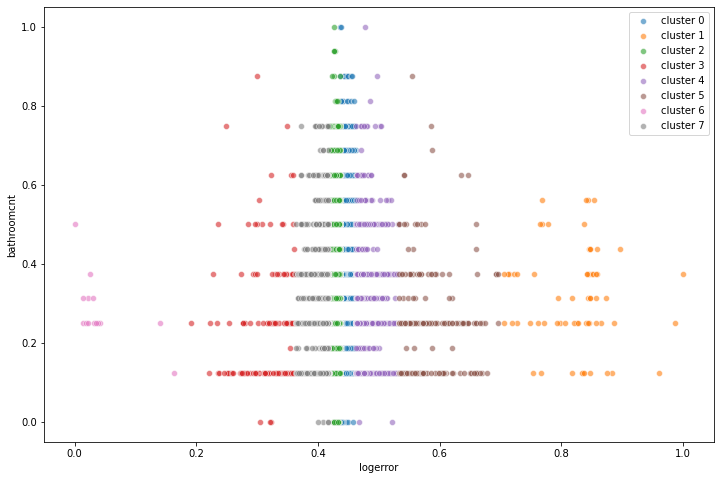

In [67]:
for cluster, subset in train.groupby('cluster_target'):
    sns.scatterplot(subset.logerror, subset.bathroomcnt, 
                label='cluster ' + str(cluster), alpha=.6)

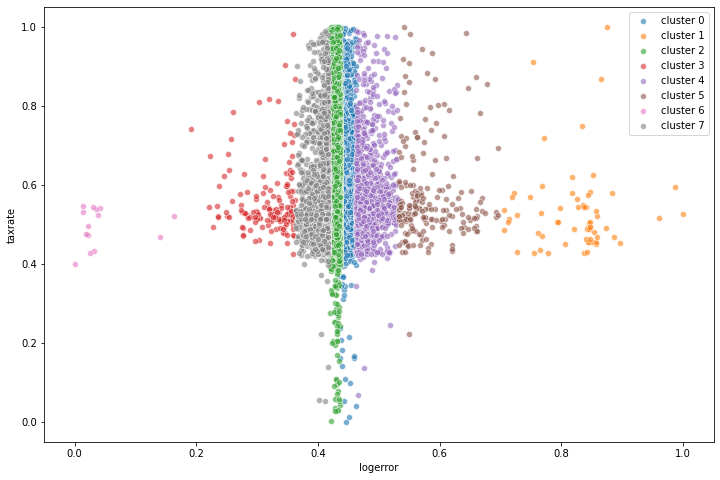

In [69]:
for cluster, subset in train.groupby('cluster_target'):
    sns.scatterplot(subset.logerror, subset.taxrate, 
                label='cluster ' + str(cluster), alpha=.6)

## Independent Variables

     k          sse
0    2  1026.484297
1    3   731.941806
2    4   507.235796
3    5   374.860965
4    6   281.670176
5    7   217.802910
6    8   178.034226
7    9   159.204439
8   10   142.475879
9   11   126.175903
10  12   110.044970
11  13    96.943236
12  14    88.814990
13  15    82.018946
14  16    76.972589
15  17    72.082544
16  18    68.456250
17  19    64.852628


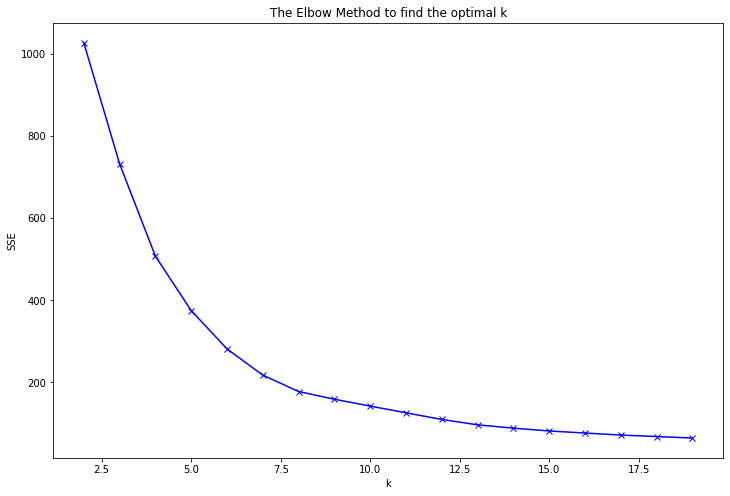

In [57]:
X = train[['latitude','longitude']]

ks = range(2,20)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

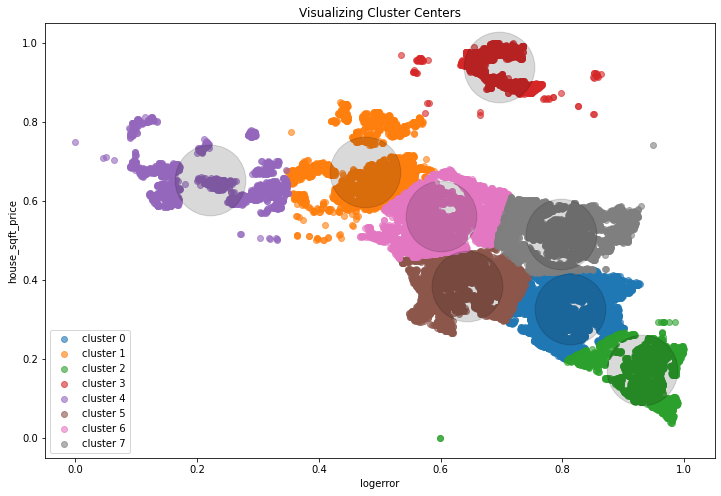

In [55]:
X = train[['latitude','longitude']]
kmeans = KMeans(8)
kmeans.fit(X)
train['cluster_ind'] = kmeans.predict(X)
for cluster, subset in train.groupby('cluster_ind'):
    plt.scatter(subset.longitude, subset.latitude, 
                label='cluster ' + str(cluster), alpha=.6)

center = pd.DataFrame(kmeans.cluster_centers_,  columns=X.columns)
plt.scatter(x = center.longitude, y = center.latitude, 
            alpha=.15, s=5000, c='black')

plt.legend()
plt.xlabel('logerror')
plt.ylabel('house_sqft_price')
plt.title('Visualizing Cluster Centers')

In [70]:
train.head(1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County,logerror,cluster_target,cluster_ind
parcelid,,,,,,,,,,,,,,,,,
14219140,0.375,0.555556,0.504594,0.512354,0.606393,0.549407,0.001515,0.773723,0.517644,0.266417,0.165801,1.0,0.0,0.0,0.452637,0,6


Text(0.5, 1.0, 'Visualizing Cluster Centers')

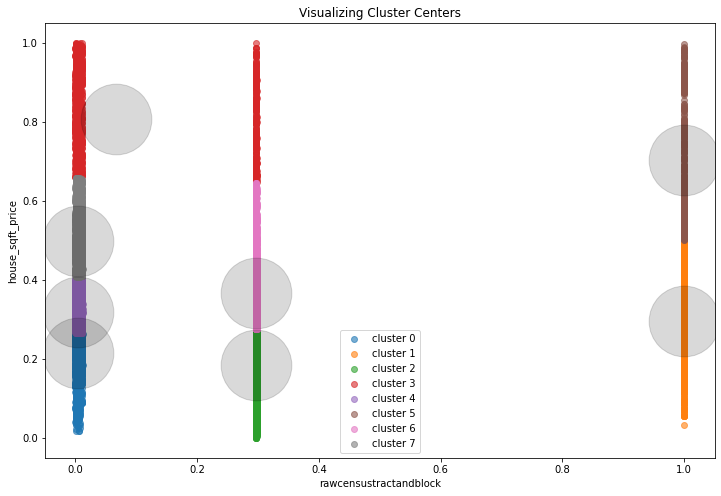

In [74]:
X = train[['rawcensustractandblock','lotsizesquarefeet']]
kmeans = KMeans(8)
kmeans.fit(X)
train['cluster_ind'] = kmeans.predict(X)
for cluster, subset in train.groupby('cluster_ind'):
    plt.scatter(subset.rawcensustractandblock, 
                subset.lotsizesquarefeet, 
                label='cluster ' + str(cluster), alpha=.6)

center = pd.DataFrame(kmeans.cluster_centers_,  columns=X.columns)
plt.scatter(x = center.rawcensustractandblock, 
            y = center.lotsizesquarefeet, 
            alpha=.15, s=5000, c='black')

plt.legend()
plt.xlabel('rawcensustractandblock')
plt.ylabel('house_sqft_price')
plt.title('Visualizing Cluster Centers')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

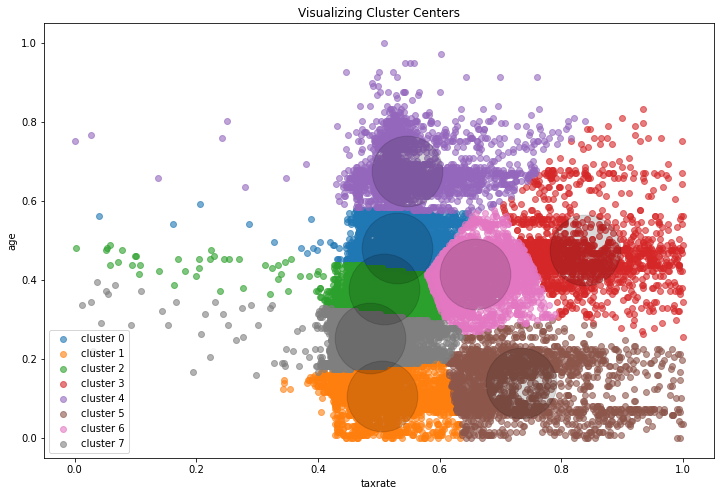

In [79]:
X = train[['taxrate','age']]
kmeans = KMeans(8)
kmeans.fit(X)
train['cluster_ind'] = kmeans.predict(X)
for cluster, subset in train.groupby('cluster_ind'):
    plt.scatter(subset.taxrate, 
                subset.age, 
                label='cluster ' + str(cluster), alpha=.6)

center = pd.DataFrame(kmeans.cluster_centers_,  columns=X.columns)
plt.scatter(x = center.taxrate, 
            y = center.age, 
            alpha=.15, s=5000, c='black')

plt.legend()
plt.xlabel('taxrate')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')